# Décodage d'une formule de pricing

Le challenge consiste à déterminer l’équation ou l’algorithme permettant de calculer les prix d’une couverture d’assurance automobile.

https://www.datascience.net/fr/challenge/26/details

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Train data

In [3]:
train = pd.read_csv("data/ech_apprentissage.csv", sep = ';', index_col = 'id', low_memory = False)
X = train.drop('prime_tot_ttc', axis = 1)

print(X.shape)
# print(X.head())

(300000, 32)


## Test data

In [4]:
X_test = pd.read_csv('data/ech_test.csv', sep = ';', index_col = 'id', low_memory = False)

print(X_test.shape)
# X_test.head()

(30000, 32)


In [ ]:
df = pd.concat([X, X_test], axis=0)

## Target

count    300000.000000
mean        346.063566
std         119.870510
min          94.780000
25%         262.050000
50%         323.220000
75%         407.500000
max        1518.810000
Name: prime_tot_ttc, dtype: float64


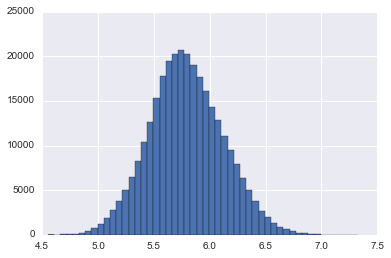

In [5]:
y = train.prime_tot_ttc

print(y.describe())
np.log(y).hist(bins=50);

## Features


* [annee_naissance](#annee_naissance)
* [annee_permis](#annee_permis)
* [marque](#marque)
* [puis_fiscale](#puis_fiscale)
* [anc_veh](#anc_veh)
* [codepostal](#codepostal)
* [energie_veh](#energie_veh)
* [kmage_annuel](#kmage_annuel)
* [crm](#crm)
* [profession](#profession)
* [var1](#var1)
* [var2](#var2)
* [var3](#var3)
* [var4](#var4)
* [var5](#var5)
* [var6](#var6)
* [var7](#var7)
* [var8](#var8)
* [var9](#var9)
* [var10](#var10)
* [var11](#var11)
* [var12](#var12)
* [var13](#var13)
* [var14](#var14)
* [var15](#var15)
* [var16](#var16)
* [var17](#var17)
* [var18](#var18)
* [var19](#var19)
* [var20](#var20)
* [var21](#var21)
* [var22](#var22)
* [age_permis](#age_permis)

### `annee_naissance`

Год рождения.

In [7]:
df.annee_naissance.describe()

count    329693.000000
mean       1983.684949
std           6.563537
min        1925.000000
25%        1980.000000
50%        1985.000000
75%        1989.000000
max        1998.000000
Name: annee_naissance, dtype: float64

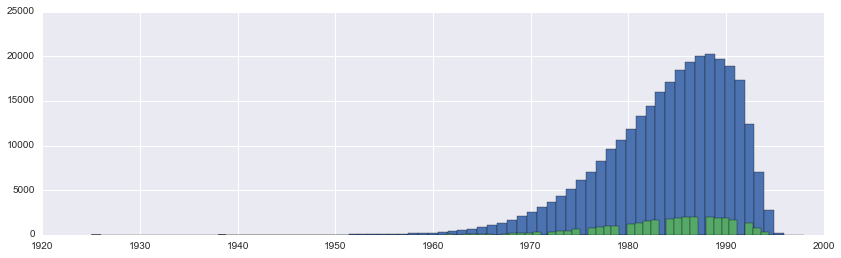

In [8]:
# X.groupby(['annee_naissance'])['annee_naissance'].count()
plt.figure(figsize=(14, 4))
X.annee_naissance.hist(bins = 72);
X_test.annee_naissance.hist(bins = 72);

### `annee_permis`

Год получения прав.

In [9]:
df.annee_permis.describe()

count    329693.000000
mean       2003.050847
std           6.590561
min        1944.000000
25%        1999.000000
50%        2004.000000
75%        2008.000000
max        2018.000000
Name: annee_permis, dtype: float64

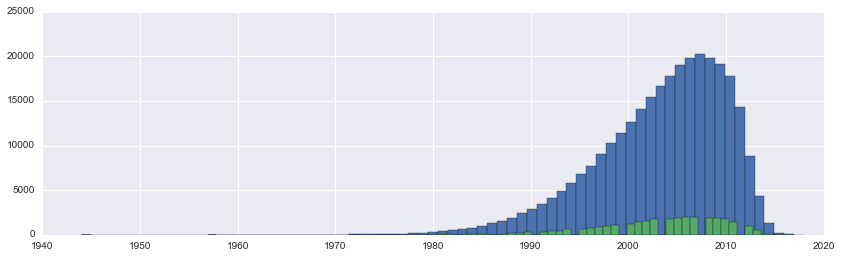

In [10]:
# X.groupby(['annee_permis'])['annee_permis'].count()
plt.figure(figsize=(14, 4))
X.annee_permis.hist(bins = 73);
X_test.annee_permis.hist(bins = 73);

### `age_permis`

Добавим фичу `age_permis` — возраст, в котором были получены права.

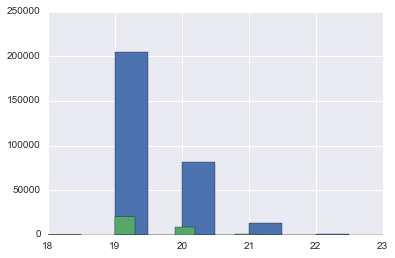

In [11]:
X['age_permis'] = X.annee_permis - X.annee_naissance
X.age_permis.hist();

X_test['age_permis'] = X_test.annee_permis - X_test.annee_naissance
X_test.age_permis.hist();

### `marque`

In [12]:
np.sort(df.marque.unique())

array(['ACMA', 'ALFA ROMEO', 'ALPINE RENAULT', 'AMC', 'AMPHICAR', 'ARO',
       'ASIA', 'ASTON MARTIN', 'AUDI', 'AUSTIN', 'AUSTIN-HEALEY',
       'AUTO-UNION', 'AUTOBIANCHI', 'AUTOLAND', 'AUVERLAND', 'BEDFORD',
       'BENTLEY', 'BERTONE', 'BMW', 'BREMACH', 'BRM', 'BUICK', 'CADILLAC',
       'CARBODIES', 'CATERHAM', 'CHENARD ET WALKER', 'CHEVROLET',
       'CHEYENNE', 'CHRYSLER', 'CITROEN', 'COURNIL', 'DACIA', 'DAEWOO',
       'DAF', 'DAIHATSU', 'DAIMLER', 'DANGEL', 'DATSUN', 'DE LOREAN',
       'DELAHAYE', 'DETHLEFFS', 'DODGE', 'DONKERVOORT', 'EAGLE', 'EBRO',
       'EBS', 'ENGIN LOISIRS', 'ENGIN SPECIAL', 'ENGIN TRAVAUX PUBLIC',
       'FERRARI', 'FIAT', 'FORD', 'FSO', 'GEELY', 'GMC', 'GME', 'GRANDIN',
       'HANOMAG', 'HONDA', 'HOTCHKISS', 'HUMMER', 'HYUNDAI', 'INFINITI',
       'INTERNATIONAL', 'ISUZU', 'IVECO', 'JAGUAR', 'JEEP', 'JIDE', 'KIA',
       'LADA', 'LAFER', 'LAMBORGHINI', 'LANCIA', 'LAND-ROVER', 'LDV',
       'LEXUS', 'LINCOLN', 'LOHR', 'LORENZ', 'LOTUS', 'MAHINDRA', 'M

### `puis_fiscale`

Налоговая ставка (на мощность двигателя машины). Зависит от года выпуска машины, лошадей и эмиссии CO2. Обратной силы до 1998 не имеет.

count    330000.000000
mean          6.821433
std           2.634030
min           0.000000
25%           5.000000
50%           6.000000
75%           8.000000
max          58.000000
Name: puis_fiscale, dtype: float64


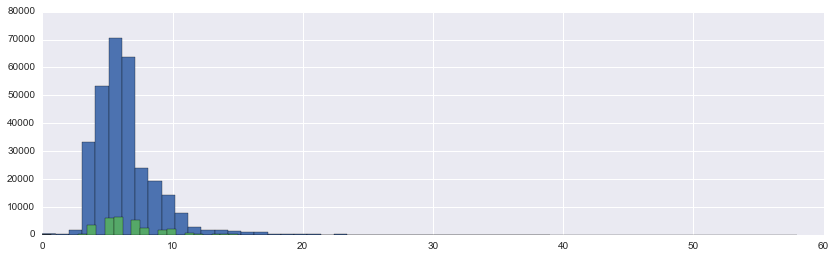

In [13]:
print(df.puis_fiscale.describe());
plt.figure(figsize = (14,4))
X.puis_fiscale.hist(bins = 57);
X_test.puis_fiscale.hist(bins = 57);

In [14]:
# df[df.puis_fiscale > 40]
df[df.puis_fiscale > 50]

,annee_naissance,annee_permis,marque,puis_fiscale,anc_veh,codepostal,energie_veh,kmage_annuel,crm,profession,...,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22
id,,,,,,,,,,,,,,,,,,,,,
47565,1944.0,1963.0,BENTLEY,51,4,14174,essence,14418,50,"enseignant, formateur, chercheur",...,2,F,0,1,3,31,2,1,1,0
74678,1933.0,1952.0,BENTLEY,54,1,24465,essence,17000,55,"enseignant, formateur, chercheur",...,4,F,0,1,2,22,0,0,1,1
162064,1932.0,1951.0,BENTLEY,51,1,54482,essence,14418,50,"agent, employe",...,2,B,3,1,1,29,0,0,0,2
182182,1936.0,1955.0,FERRARI,58,40,62498,essence,12296,50,profession liberale,...,2,A,2,4,1,23,0,0,1,3
220841,1937.0,1956.0,AUDI,51,34,75109,essence,13366,50,"cadre, ingenieur",...,4,G,2,4,4,24,0,1,0,3
240427,1925.0,1944.0,FERRARI,58,4,78650,essence,12296,50,"enseignant, formateur, chercheur",...,2,G,0,1,1,15,0,1,1,1
254274,1947.0,1967.0,BENTLEY,51,2,83137,essence,14418,50,"enseignant, formateur, chercheur",...,2,A,0,1,2,23,0,1,1,1
279724,1942.0,1961.0,BENTLEY,51,2,92051,essence,14543,50,"enseignant, formateur, chercheur",...,2,G,1,1,2,21,0,0,1,2
299719,1943.0,1963.0,ROLLS ROYCE,53,3,97107,essence,14954,50,"enseignant, formateur, chercheur",...,4,N,0,1,1,20,0,1,1,1


### `anc_veh`

Возраст машины.

count    330000.000000
mean         16.206209
std          24.699703
min           0.000000
25%           1.000000
50%           2.000000
75%          31.000000
max          99.000000
Name: anc_veh, dtype: float64


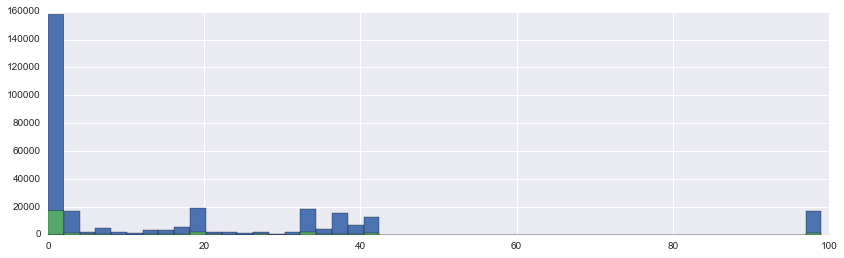

In [15]:
print(df.anc_veh.describe())
plt.figure(figsize = (14, 4))
X.anc_veh.hist(bins = 49);
X_test.anc_veh.hist(bins = 49);

In [16]:
# df[df.anc_veh == 99]
df[df.anc_veh == 99].shape

(18527, 32)

### `codepostal`

Почтовый индекс.

In [17]:
X.codepostal.value_counts().head()

13001    2606
6088     2295
31555    2275
35238    1992
20004    1932
Name: codepostal, dtype: int64

In [18]:
X_test.codepostal.value_counts().head()

1034     9723
97411    2820
97415    1965
97422    1520
97416    1405
Name: codepostal, dtype: int64

### `energie_veh`

gazole             181651
essence            139528
gpl                  7229
hybride essence       854
NR                    430
electricite           308
Name: energie_veh, dtype: int64


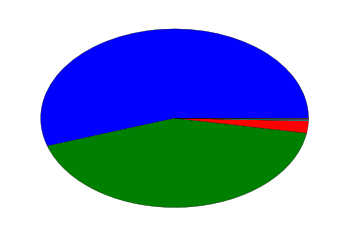

In [19]:
print(df.energie_veh.value_counts())
plt.pie(df.energie_veh.value_counts());

### `kmage_annuel`

* кластеризовать (сделать новую переменную)

count    330000.000000
mean       7363.165261
std        3086.819353
min         282.000000
25%        6387.000000
50%        6928.000000
75%        7467.000000
max       17102.000000
Name: kmage_annuel, dtype: float64


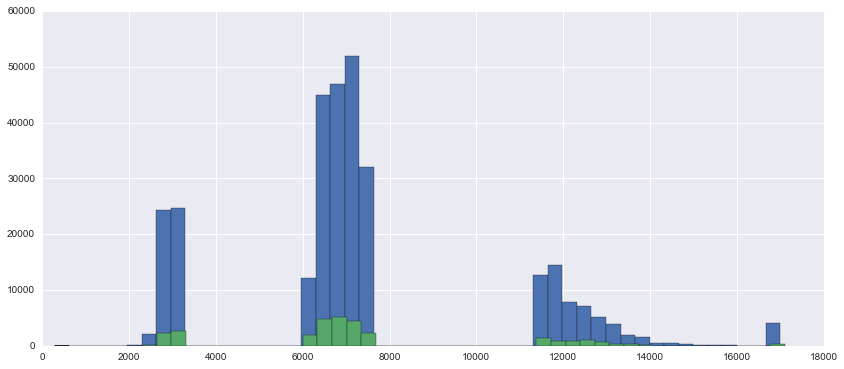

In [20]:
print(df.kmage_annuel.describe())

plt.figure(figsize=(14, 6));
X.kmage_annuel.hist(bins = 50);
X_test.kmage_annuel.hist(bins = 50);

In [21]:
df[df.kmage_annuel >= 17000].sort_values(by="kmage_annuel")

,annee_naissance,annee_permis,marque,puis_fiscale,anc_veh,codepostal,energie_veh,kmage_annuel,crm,profession,...,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22
id,,,,,,,,,,,,,,,,,,,,,
213,1987.0,2006.0,TOYOTA,5,2,1034,gazole,17000,50,"enseignant, formateur, chercheur",...,5,N,2,1,1,33,2,1,1,0
213202,1983.0,2002.0,CITROEN,6,2,72315,gazole,17000,95,"enseignant, formateur, chercheur",...,5,F,1,1,1,27,0,0,0,1
213217,1981.0,2000.0,RENAULT,4,0,72319,essence,17000,50,"enseignant, formateur, chercheur",...,5,B,1,3,1,29,0,1,1,1
213242,1996.0,2015.0,CITROEN,2,1,72328,essence,17000,50,"enseignant, formateur, chercheur",...,5,B,0,1,1,21,0,1,1,2
213277,1986.0,2006.0,RENAULT,7,0,72329,gpl,17000,72,"enseignant, formateur, chercheur",...,5,B,3,3,1,21,1,0,1,0
213337,1992.0,2011.0,FIAT,3,4,72344,essence,17000,57,"enseignant, formateur, chercheur",...,5,B,1,1,4,23,1,0,1,0
213478,NaN,NaN,NR,0,1,73003,NR,17000,50,"enseignant, formateur, chercheur",...,5,F,0,1,2,23,0,0,1,1
213547,1982.0,2001.0,PEUGEOT,9,0,73008,essence,17000,50,"agent, employe",...,5,D,2,4,1,21,0,0,0,4
213571,1989.0,2009.0,VOLKSWAGEN,9,28,73008,essence,17000,100,technicien,...,5,D,1,3,1,24,0,0,1,1


In [22]:
from sklearn import cluster

In [23]:
kmage_annuel = pd.DataFrame(X['kmage_annuel'])

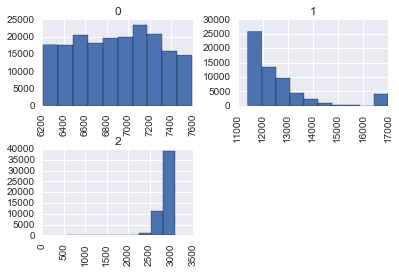

In [24]:
km_3 = cluster.KMeans(n_clusters=3)
km_3.fit(kmage_annuel)

plt.figure(figsize=(14,6))
kmage_annuel.hist(by=km_3.labels_);

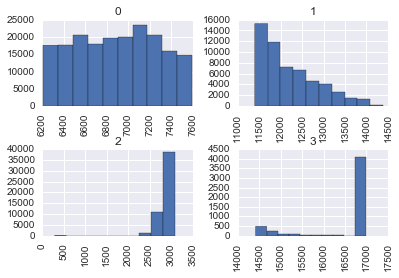

In [25]:
km_4 = cluster.KMeans(n_clusters=4)
km_4.fit(kmage_annuel)

plt.figure(figsize=(14,6));
kmage_annuel.hist(by=km_4.labels_);

In [26]:
sub_6928 = df[df.kmage_annuel == 6928]
sub_6387 = df[df.kmage_annuel == 6387]

print(sub_6928.shape)
print(sub_6387.shape)

(2559, 32)
(2905, 32)


In [27]:
sub_6928.marque.value_counts()

PEUGEOT       415
RENAULT       398
FIAT          343
ALFA ROMEO    294
CITROEN       291
LANCIA        123
MERCEDES      116
LADA           90
AUDI           87
OPEL           62
VOLKSWAGEN     61
HYUNDAI        53
FORD           47
TOYOTA         46
NISSAN         37
MITSUBISHI     29
CHEVROLET      25
MAZDA          17
DAEWOO         12
BMW             8
SAAB            3
DACIA           2
Name: marque, dtype: int64

In [28]:
sub_6387.marque.value_counts()

PEUGEOT       849
RENAULT       675
VOLKSWAGEN    590
CITROEN       152
FORD          106
AUDI           99
SUZUKI         64
SEAT           61
FIAT           59
MERCEDES       53
OPEL           49
SKODA          47
ROVER          32
NISSAN         16
BMW            15
MITSUBISHI     13
ARO             8
MAZDA           6
LANCIA          4
SUBARU          3
MG              2
ALFA ROMEO      1
DAEWOO          1
Name: marque, dtype: int64

### `crm`

Coefficient de Réduction Majoration (CRM), он же bonus malus, т.н. понижающий коэффициент за хорошее вождение. Не может быть меньше 0.5. [Source](http://www.direct-assurance.fr/assurance/assurance-auto/faq-auto/evolution-du-bonus-malus-@/view-161-dafaq.html)

Смело можно делить на `100.0` и получать реальное значение.
Раз CRM - это поправочный коэффициент, то на него можно делить и считать его отдельно от базовой ставки.

count    330000.000000
mean         73.345639
std          23.614768
min          50.000000
25%          50.000000
50%          68.000000
75%          95.000000
max         270.000000
Name: crm, dtype: float64


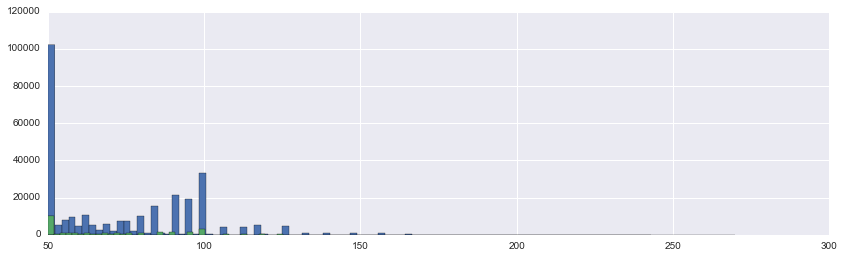

In [29]:
print(df.crm.describe())
plt.figure(figsize=(14,4));
X.crm.hist(bins = 100);
X_test.crm.hist(bins = 100);
# np.log(X.crm).hist();

In [30]:
# X.crm.value_counts()

### `profession`

Профессии:

* преподаватель, тренер, исследователь
* агент, сотрудник
* рамки, инженер
* техник
* педагог, ведущий, монитор
* Либеральная профессия
* работник
* работоискатель
* студент
* ремесленник
* профессия в области искусств и развлечений
* мужчина или женщина, у себя дома
* КоммерсантЪ
* Промежуточное профессия здравоохранения и социальной работы в 
* Лидер бизнеса
* Форман, мастерство агент
* оператор фермер

In [31]:
df.profession.value_counts()

enseignant, formateur, chercheur                             122484
agent, employe                                                83801
cadre, ingenieur                                              33151
technicien                                                    16730
educateur, animateur, moniteur                                14592
profession liberale                                           11475
ouvrier                                                       10065
demandeur d'emploi                                             7298
etudiant                                                       6266
artisan                                                        5580
profession de l'information des arts et des spectacles         5012
homme ou femme au foyer                                        4963
commercant                                                     2866
profession intermediaire de la sante et du travail social      2485
chef d'entreprise                               

### `var1`

Судя по всему, стаж вождения.

In [32]:
# pd.DataFrame([X.annee_naissance, X.age_permis, X.var1]).transpose()

In [33]:
# X.var1.isnull().sum()

# var1 = X.var1.fillna(0)

# X[var1 == 0]

# y[var1 == 0]

In [34]:
print(df.var1.isnull().sum())
print(df.var1.value_counts().sort_index())

307
-2.0         1
-1.0         3
 0.0        44
 1.0       229
 2.0      1394
 3.0      4857
 4.0      9834
 5.0     15682
 6.0     19529
 7.0     21048
 8.0     21772
 9.0     22295
 10.0    21692
 11.0    20951
 12.0    19569
 13.0    18465
 14.0    17012
 15.0    15565
 16.0    13865
 17.0    12456
 18.0    11281
 19.0    10003
 20.0     8527
 21.0     7473
 22.0     6440
 23.0     5305
 24.0     4499
 25.0     3795
 26.0     3186
 27.0     2670
         ...  
 38.0      208
 39.0      148
 40.0      124
 41.0       77
 42.0       62
 43.0       46
 44.0       46
 45.0       35
 46.0       22
 47.0       27
 48.0       15
 49.0       12
 50.0       15
 51.0        8
 52.0        7
 53.0        5
 54.0        4
 55.0        4
 56.0        5
 57.0        1
 58.0        2
 59.0        1
 60.0        2
 61.0        1
 62.0        1
 64.0        2
 65.0        1
 67.0        1
 69.0        1
 72.0        1
Name: var1, dtype: int64


In [35]:
df[df.var1 < 0]

,annee_naissance,annee_permis,marque,puis_fiscale,anc_veh,codepostal,energie_veh,kmage_annuel,crm,profession,...,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22
id,,,,,,,,,,,,,,,,,,,,,
73957,1998.0,2017.0,ENGIN TRAVAUX PUBLIC,0,99,24305,NR,17000,50,homme ou femme au foyer,...,5,F,0,5,1,28,0,0,1,2
164538,1998.0,2017.0,ENGIN TRAVAUX PUBLIC,0,0,56090,NR,17000,54,"cadre, ingenieur",...,5,B,0,4,1,24,0,0,1,1
189145,1998.0,2017.0,ENGIN LOISIRS,0,1,64256,NR,17000,50,"enseignant, formateur, chercheur",...,5,F,2,1,2,28,0,1,1,1
247712,1998.0,2018.0,ENGIN TRAVAUX PUBLIC,0,3,81257,NR,17000,50,"agent, employe",...,5,C,0,1,4,21,1,1,1,0


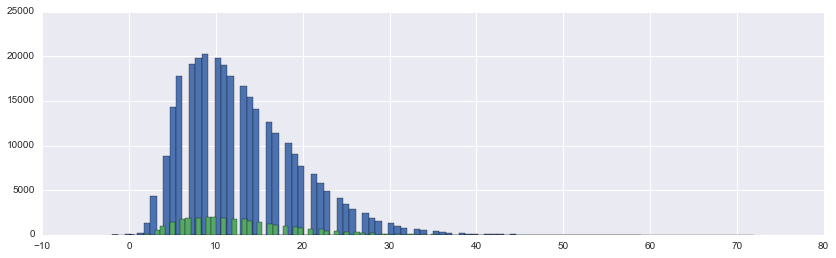

In [36]:
plt.figure(figsize = (14, 4))
X.var1.hist(bins = 100);
X_test.var1.hist(bins = 100);

Составим отдельный сабсет из наблюдений, где `var1 == NaN` (люди, у которых нет прав).

In [37]:
var_1_na = df[df.var1.isnull()]

In [38]:
var_1_na.var7.value_counts()

NR    307
Name: var7, dtype: int64

In [39]:
var_1_na.describe()

,annee_naissance,annee_permis,puis_fiscale,anc_veh,kmage_annuel,crm,var1,var2,var3,var4,...,var11,var12,var13,var15,var17,var18,var19,var20,var21,var22
count,0.0,0.0,307.0,307.000000,307.0,307.000000,0.0,307.000000,307.000000,307.000000,...,307.000000,307.0,307.0,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000
mean,NaN,NaN,0.0,12.390879,17000.0,57.289902,NaN,2.247557,340.729642,1.247557,...,12.390879,3211.0,5.0,1.159609,1.566775,24.429967,0.602606,0.553746,0.931596,1.084691
std,NaN,NaN,0.0,20.370514,0.0,14.661675,NaN,1.431652,46.435160,1.642159,...,20.370514,0.0,0.0,1.145008,0.941736,4.657289,1.092933,0.497915,0.252850,1.275457
min,NaN,NaN,0.0,0.000000,17000.0,50.000000,NaN,1.000000,272.000000,0.000000,...,0.000000,3211.0,5.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,0.0,1.000000,17000.0,50.000000,NaN,1.000000,272.000000,0.000000,...,1.000000,3211.0,5.0,0.000000,1.000000,22.000000,0.000000,0.000000,1.000000,0.000000
50%,NaN,NaN,0.0,2.000000,17000.0,50.000000,NaN,1.000000,372.000000,1.000000,...,2.000000,3211.0,5.0,1.000000,1.000000,24.000000,0.000000,1.000000,1.000000,1.000000
75%,NaN,NaN,0.0,19.000000,17000.0,56.000000,NaN,4.000000,372.000000,2.000000,...,19.000000,3211.0,5.0,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000,2.000000
max,NaN,NaN,0.0,99.000000,17000.0,125.000000,NaN,5.000000,372.000000,7.000000,...,99.000000,3211.0,5.0,5.000000,5.000000,39.000000,7.000000,1.000000,1.000000,8.000000


In [41]:
X_test[X_test.var1.isnull()].shape

(17, 33)

В тесте таких 17, в трейне, соответственно, 290.

In [43]:
y[train.var1.isnull()]

id
1379      152.49
3013      176.85
3273      185.72
3758      158.81
3846      185.70
4241      129.13
4864      219.82
5260      284.59
5962      161.08
6581      218.12
7086      141.80
8590      476.43
10919     178.67
13138     234.09
16406     187.05
17732     187.09
18368     222.77
19223     195.32
20832     168.92
20899     204.58
22078     298.36
22443     289.02
26584     207.73
28584     217.86
29676     217.44
30433     205.96
37397     173.65
39912     158.44
40541     225.22
40553     169.99
           ...  
266815    217.42
267387    190.39
270205    261.34
270249    249.68
270357    234.49
271148    178.96
271643    245.67
272307    161.83
273510    292.42
273512    201.89
273787    195.90
274835    157.78
276777    274.75
277360    139.47
277740    161.99
279713    373.83
279716    192.14
281099    235.80
281266    176.12
287251    144.05
288515    351.89
288795    309.66
289019    161.83
289285    194.33
290331    168.11
291075    195.49
291865    352.96
294577    1

### `var2`

In [37]:
print(df.var2.isnull().sum())
print(df.var2.value_counts())

0
4    72810
1    70810
5    60927
3    60417
2    59498
0     5538
Name: var2, dtype: int64


In [38]:
df[df.var2 == 0]

,annee_naissance,annee_permis,marque,puis_fiscale,anc_veh,codepostal,energie_veh,kmage_annuel,crm,profession,...,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22
id,,,,,,,,,,,,,,,,,,,,,
94,1984.0,2003.0,LAND-ROVER,8,1,1034,gazole,11541,50,"enseignant, formateur, chercheur",...,5,N,0,1,1,20,0,1,1,2
336,1971.0,1990.0,LAND-ROVER,8,1,1034,gazole,11541,50,"enseignant, formateur, chercheur",...,5,N,0,1,1,20,0,1,1,2
441,1987.0,2006.0,VOLKSWAGEN,4,2,1034,gazole,3098,68,"enseignant, formateur, chercheur",...,3,N,2,1,2,34,0,1,1,4
551,1988.0,2007.0,TOYOTA,9,1,1034,gazole,7483,69,"enseignant, formateur, chercheur",...,5,N,2,1,2,25,0,1,1,1
739,1987.0,2008.0,SUZUKI,9,3,1034,essence,6913,50,"enseignant, formateur, chercheur",...,5,N,0,1,1,34,0,1,1,3
839,1976.0,1995.0,CHRYSLER,13,2,1034,essence,11943,50,"enseignant, formateur, chercheur",...,2,N,1,1,1,24,0,0,1,1
855,1987.0,2007.0,CITROEN,11,4,1034,essence,7037,50,"enseignant, formateur, chercheur",...,5,N,2,1,1,24,0,1,1,3
962,1983.0,2002.0,CHRYSLER,13,2,1034,essence,11943,62,"enseignant, formateur, chercheur",...,2,N,1,1,1,24,0,1,1,3
995,1978.0,1998.0,CITROEN,11,4,1034,essence,7037,50,"enseignant, formateur, chercheur",...,5,N,2,1,1,22,0,1,1,2


### `var3`

In [39]:
print(df.var3.isnull().sum())
print(df.var3.value_counts())

0
372    187804
272    142196
Name: var3, dtype: int64


In [40]:
df[df.var3 == 372]

,annee_naissance,annee_permis,marque,puis_fiscale,anc_veh,codepostal,energie_veh,kmage_annuel,crm,profession,...,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22
id,,,,,,,,,,,,,,,,,,,,,
1,1986.0,2006.0,RENAULT,4,1,1034,gpl,2924,68,"enseignant, formateur, chercheur",...,3,N,1,1,1,27,0,0,0,1
2,1986.0,2006.0,RENAULT,8,2,1034,gpl,11580,50,"enseignant, formateur, chercheur",...,5,N,2,1,1,28,0,0,0,1
3,1982.0,2001.0,RENAULT,7,2,1034,gpl,7149,95,"enseignant, formateur, chercheur",...,5,N,3,1,1,29,0,0,0,1
4,1987.0,2006.0,DACIA,5,2,1034,gpl,6526,100,"enseignant, formateur, chercheur",...,5,N,3,1,1,29,0,0,0,1
5,1994.0,2013.0,CITROEN,4,2,1034,gpl,2872,50,"cadre, ingenieur",...,5,N,2,1,4,26,0,1,1,4
6,1985.0,2006.0,HONDA,5,2,1034,hybride essence,7191,100,"enseignant, formateur, chercheur",...,4,N,0,1,4,27,0,1,1,4
7,1974.0,1994.0,CHRYSLER,11,2,1034,gpl,12387,100,"enseignant, formateur, chercheur",...,4,N,2,1,4,27,0,1,1,4
8,1989.0,2008.0,DAEWOO,9,1,1034,gpl,7227,100,"enseignant, formateur, chercheur",...,5,N,2,1,4,27,0,1,1,4
9,1987.0,2006.0,RENAULT,8,2,1034,gpl,11580,50,"enseignant, formateur, chercheur",...,5,N,2,1,1,33,0,0,1,2


### `var4`

In [41]:
print(df.var4.isnull().sum())
print(df.var4.value_counts())

0
0    153696
1     61638
2     60989
3     24574
4      9557
5      9556
7      3896
6      3768
9      1744
8       582
Name: var4, dtype: int64


### `var5`

In [42]:
print(df.var5.isnull().sum())
print(df.var5.value_counts())

0
1    190549
2    139451
Name: var5, dtype: int64


### `var6`

In [43]:
print(df.var6.isnull().sum())
print(df.var6.value_counts())

0
B    127920
A     98693
C     83813
D     18978
N       596
Name: var6, dtype: int64


### `var7`

In [44]:
print(df.var7.isnull().sum())
print(df.var7.value_counts())

0
1     169758
3      35802
11     23368
10     23198
4      15106
5      13384
7       9921
8       9189
20      9099
2       8349
6       5007
12      2537
14      2253
13      1552
9        855
0        309
NR       307
50         5
30         1
Name: var7, dtype: int64


### `var8`

In [45]:
print(df.var8.isnull().sum())
print(df.var8.value_counts())

0
M1    101090
B2     74439
M2     58033
H1     25922
B1     25170
T3      8946
T2      7938
F       5915
K       4176
T1      3130
T4      3020
MC      2292
K2      2273
PU      1802
P3      1755
VA      1559
H2      1490
NR       604
TU       407
P1        16
P2        16
P4         5
K3         1
B          1
Name: var8, dtype: int64


### `var9`

In [46]:
print(df.var9.isnull().sum())
print(df.var9.value_counts().head(10))

0
90     30983
60     19426
75     19344
110    18560
115    11736
65     11205
100    10463
105     9473
70      9417
80      7871
Name: var9, dtype: int64


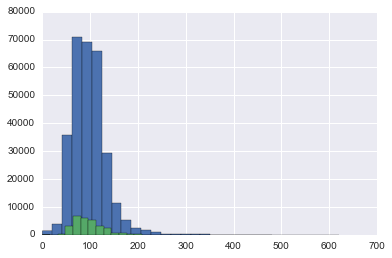

In [47]:
X.var9.hist(bins = 30);
X_test.var9.hist(bins = 30);

### `var10`

In [73]:
print(df.var10.isnull().sum())
print(df.var10.value_counts().head())

0
180    17312
170    13994
185    13002
175    12827
160    12577
Name: var10, dtype: int64


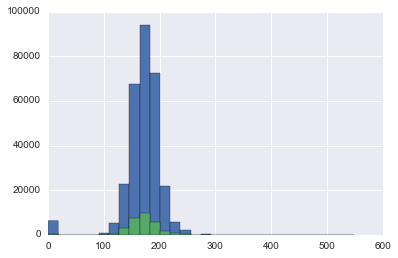

In [49]:
X.var10.hist(bins=30);
X_test.var10.hist(bins=30);

### `var11`

In [71]:
print(df.var11.isnull().sum())
print(df.var11.value_counts().head())

0
0     69960
2     55923
1     49192
99    18527
34    15941
Name: var11, dtype: int64


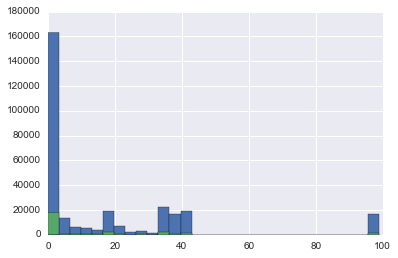

In [72]:
X.var11.hist(bins=30);
X_test.var11.hist(bins=30);

### `var12`

In [67]:
print(df.var12.isnull().sum())
print(df.var12.value_counts().head())

0
3211    4429
960     3980
890     3938
980     3681
1300    3491
Name: var12, dtype: int64


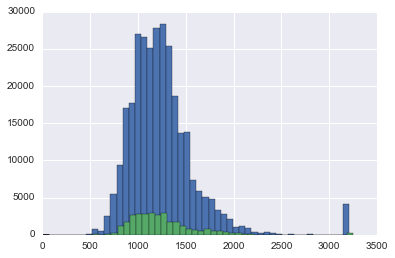

In [69]:
X.var12.hist(bins = 50);
X_test.var12.hist(bins = 50);

In [70]:
df[df.var12 > 3000]

,annee_naissance,annee_permis,marque,puis_fiscale,anc_veh,codepostal,energie_veh,kmage_annuel,crm,profession,...,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22
id,,,,,,,,,,,,,,,,,,,,,
213,1987.0,2006.0,TOYOTA,5,2,1034,gazole,17000,50,"enseignant, formateur, chercheur",...,5,N,2,1,1,33,2,1,1,0
376,1975.0,1995.0,MERCEDES,8,2,1034,gazole,17000,100,"enseignant, formateur, chercheur",...,5,N,2,1,1,25,0,0,1,4
438,1985.0,2005.0,DAIHATSU,11,4,1034,gazole,17000,50,"enseignant, formateur, chercheur",...,3,N,2,1,1,22,0,0,1,1
603,1982.0,2001.0,KIA,8,4,1034,gazole,17000,62,"enseignant, formateur, chercheur",...,5,N,0,1,1,35,0,1,1,1
645,1981.0,2000.0,CITROEN,3,4,1034,essence,17000,100,"enseignant, formateur, chercheur",...,5,N,2,1,1,25,0,1,1,9
655,1987.0,2006.0,FIAT,5,2,1034,essence,17000,139,"enseignant, formateur, chercheur",...,3,N,2,1,1,25,0,0,1,1
663,1991.0,2010.0,VOLKSWAGEN,7,2,1034,essence,17000,80,"enseignant, formateur, chercheur",...,5,N,4,1,2,21,1,0,0,0
721,1977.0,1996.0,VOLVO,13,4,1034,essence,17000,106,"enseignant, formateur, chercheur",...,5,N,2,1,1,26,0,0,1,2
772,1987.0,2006.0,VOLKSWAGEN,9,2,1034,essence,17000,100,"enseignant, formateur, chercheur",...,5,N,1,1,1,32,0,1,1,1


### `var13`

In [66]:
print(df.var13.isnull().sum())
print(df.var13.value_counts())

0
5    196599
3     79012
4     32822
2     21567
Name: var13, dtype: int64


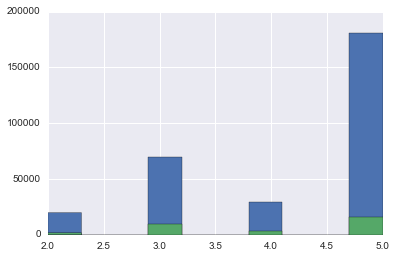

In [78]:
X.var13.hist();
X_test.var13.hist();

### `var14`

In [65]:
print(df.var14.isnull().sum())
print(df.var14.value_counts())

0
A    62469
B    62449
F    46276
G    45126
N    35067
C    34351
D    32757
E    11505
Name: var14, dtype: int64


### `var15`

In [64]:
print(df.var15.isnull().sum())
print(df.var15.value_counts())

0
0    116228
2    108778
1     61916
3     32705
4      7699
5      1808
6       590
7       162
8        82
9        32
Name: var15, dtype: int64


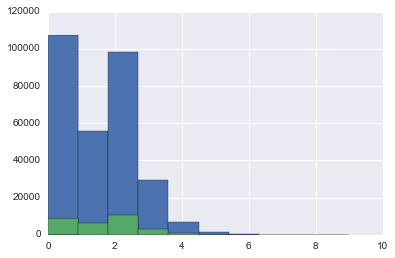

In [77]:
X.var15.hist();
X_test.var15.hist();

### `var16`

In [63]:
print(df.var16.isnull().sum())
print(df.var16.value_counts())

0
1     174691
4     107415
5      18527
3      18375
2       6773
0       3849
NR       370
Name: var16, dtype: int64


In [79]:
df[df.var16 == 'NR']

,annee_naissance,annee_permis,marque,puis_fiscale,anc_veh,codepostal,energie_veh,kmage_annuel,crm,profession,...,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22
id,,,,,,,,,,,,,,,,,,,,,
2548,1993.0,2012.0,RENAULT,5,0,1238,gazole,6308,61,artisan,...,5,A,2,NR,1,26,0,1,1,2
3240,1975.0,1994.0,MERCEDES,9,0,1354,essence,17000,95,artisan,...,5,B,2,NR,1,25,1,1,1,0
3821,1987.0,2007.0,PEUGEOT,6,0,2064,gazole,7216,100,artisan,...,5,D,2,NR,1,26,0,1,1,1
3917,1985.0,2004.0,CITROEN,6,0,2141,gazole,7247,85,artisan,...,5,F,2,NR,2,27,4,1,1,0
3918,1989.0,2008.0,CITROEN,6,0,2141,gazole,7247,106,artisan,...,5,F,2,NR,2,28,4,1,1,0
4444,1989.0,2008.0,CITROEN,5,0,2408,gazole,7211,85,artisan,...,5,D,2,NR,2,32,1,1,1,0
5034,1986.0,2006.0,SAAB,7,0,2722,gazole,7509,50,artisan,...,3,D,2,NR,2,27,0,1,1,6
7649,1987.0,2006.0,PEUGEOT,5,0,4209,gazole,6511,100,artisan,...,5,F,2,NR,1,38,4,1,1,0
8289,1974.0,1994.0,TOYOTA,17,0,5061,gazole,14788,56,artisan,...,5,D,2,NR,1,24,0,1,1,2


### `var17`

In [62]:
print(df.var17.isnull().sum())
print(df.var17.value_counts())

0
1    209723
2     75378
4     33905
3      8839
0      1984
5       171
Name: var17, dtype: int64


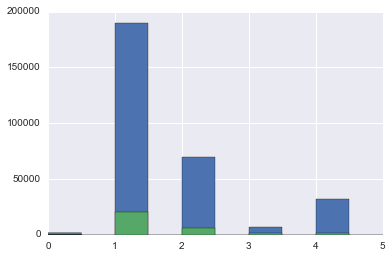

In [80]:
X.var17.hist();
X_test.var17.hist();

### `var18`

In [74]:
print(df.var18.isnull().sum())
print(df.var18.value_counts())

0
23    36281
22    36116
24    33843
21    32648
25    29404
26    25553
20    23035
27    20606
28    15433
19    13697
29    11151
30     7953
31     6451
18     5352
32     4956
33     3925
34     3132
17     2462
35     2401
36     1933
37     1724
38     1517
39     1155
14      988
16      929
13      917
15      915
12      755
11      641
40      572
10      509
9       414
8       349
7       314
41      281
4       271
5       269
6       269
3       224
1       168
2       162
42      132
0       100
43       55
44       31
45        7
Name: var18, dtype: int64


### `var19`

In [81]:
print(df.var19.isnull().sum())
print(df.var19.value_counts())

0
0     230464
1      54328
2      26899
3      10770
4       4196
5       1604
6        708
7        385
8        248
9        126
11        66
10        50
12        32
13        30
14        17
15        16
16        14
20        14
17        10
18         6
19         3
21         3
27         3
25         2
34         2
32         1
23         1
24         1
28         1
Name: var19, dtype: int64


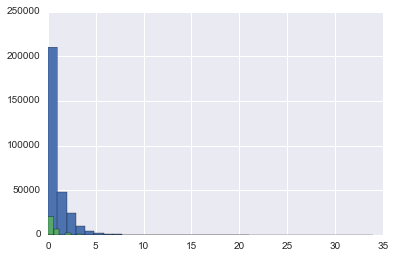

In [83]:
X.var19.hist(bins = 35);
X_test.var19.hist(bins = 35);

### `var20`

In [84]:
print(df.var20.isnull().sum())
print(df.var20.value_counts())

0
1    175294
0    154706
Name: var20, dtype: int64


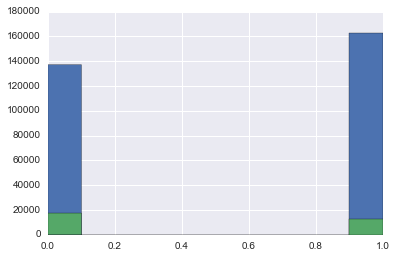

In [85]:
X.var20.hist();
X_test.var20.hist();

### `var21`

In [86]:
print(df.var21.isnull().sum())
print(df.var21.value_counts())

0
1    299079
0     30921
Name: var21, dtype: int64


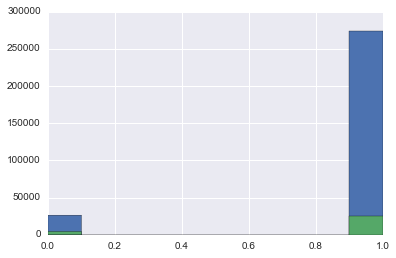

In [87]:
X.var21.hist();
X_test.var21.hist();

### `var22`

In [88]:
print(df.var22.isnull().sum())
print(df.var22.value_counts())

0
0     126690
1     104232
2      61316
3      24108
4       8271
5       3037
6       1179
7        497
8        251
9        149
10       106
11        44
13        39
12        28
14        20
15         8
17         8
22         4
25         3
60         3
18         2
30         2
59         1
16         1
20         1
Name: var22, dtype: int64


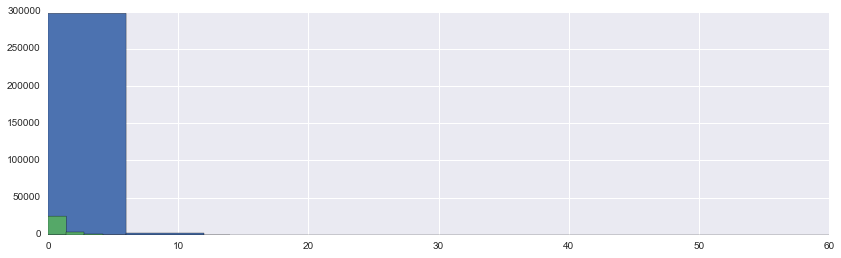

In [90]:
plt.figure(figsize = (14, 4))
X.var22.hist();
X_test.var22.hist();

---------

## Корреляции

In [ ]:
df.corr()

In [ ]:
X.corrwith(y)